In [60]:
#!pip install numpy
#!pip install matplotlib
#!pip install pandas
#!pip install openpyxl

In [61]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [62]:
df=pd.read_excel('док1.xlsx', sheet_name='Лист2')
df.sample(5) #эта команда выведет пять случайных строк таблицы, таблица не отобразиться полностью

,Країна,Офшорні статки,Номінал. ВВП,Загальні податкові втрати,Втрати від под. уникнення,Втрати від под. ухилення,Податк. надходження,Населення
100,Мавританія,300,8176,18.723821,12.434212,6.289609,1010.994026,4.259680
94,Малаві,400,8488,56.666998,51.252255,5.414743,1070.312096,17.580067
35,Республіка Конго,800,10232,12.966239,0.791371,12.174869,1420.133709,5.093813
88,Ліберія,13900,3033,193.892151,0.000000,193.892151,368.120225,4.677510
90,Литва,1200,55688,99.781709,90.652973,9.128736,7958.649650,2.888272


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Країна                     174 non-null    object 
 1   Офшорні статки             174 non-null    int64  
 2   Номінал. ВВП               174 non-null    int64  
 3   Загальні податкові втрати  174 non-null    float64
 4   Втрати від под. уникнення  174 non-null    float64
 5   Втрати від под. ухилення   174 non-null    float64
 6   Податк. надходження        174 non-null    float64
 7   Населення                  174 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 11.0+ KB


In [64]:
# Drop useless
df = df.drop(['Країна'], axis='columns', inplace=False)

In [65]:
df.columns

Index(['Офшорні статки', 'Номінал. ВВП', 'Загальні податкові втрати',
       'Втрати від под. уникнення', 'Втрати від под. ухилення',
       'Податк. надходження', 'Населення'],
      dtype='object')

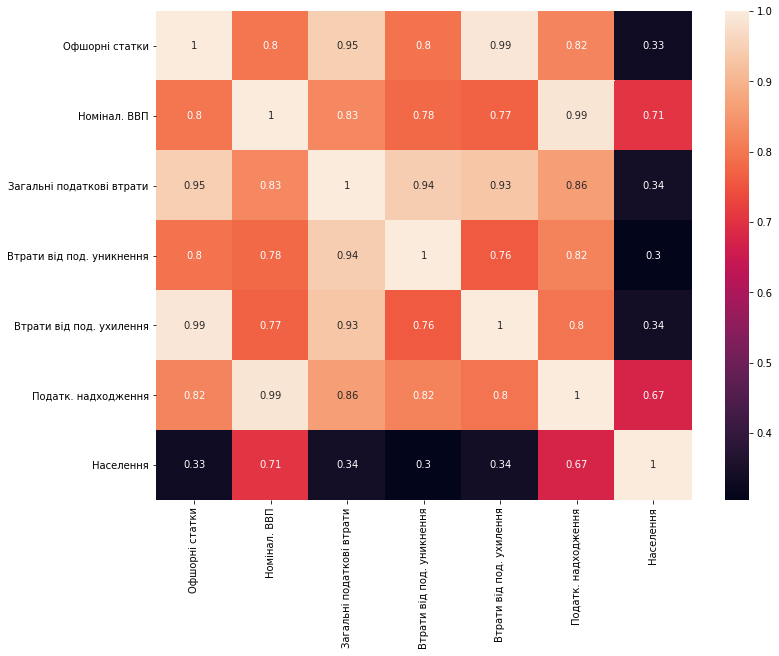

In [66]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

# Hierarchical Clustering

In [67]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [68]:
# Encoding categorical data
df = encoding_char(df)

In [69]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
df = pd.DataFrame(df, columns = ['Офшорні статки', 'Номінал. ВВП', 'Загальні податкові втрати',
       'Втрати від под. уникнення', 'Втрати від под. ухилення',
       'Податк. надходження', 'Населення']).round(2)

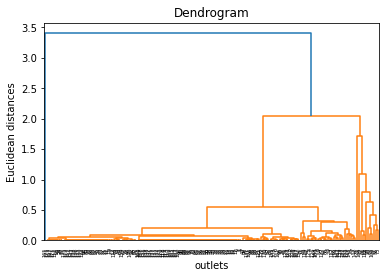

In [70]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('outlets')
plt.ylabel('Euclidean distances')
plt.show()

# K-Means Clustering

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


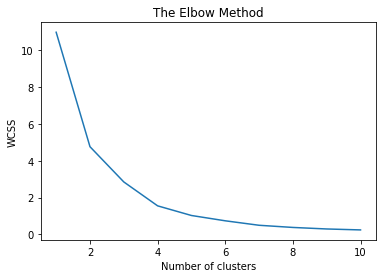

In [71]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

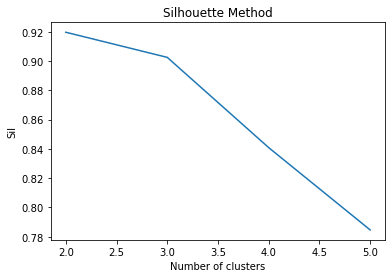

2:0.9197446211509869
3:0.902573783670607
4:0.8408823428725591
5:0.7846336948244271


In [72]:
# Using the silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 6):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 6), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

In [73]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 3, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = ['Офшорні статки', 'Номінал. ВВП', 'Загальні податкові втрати',
       'Втрати від под. уникнення', 'Втрати від под. ухилення',
       'Податк. надходження', 'Населення']).round(2)

,Офшорні статки,Номінал. ВВП,Загальні податкові втрати,Втрати від под. уникнення,Втрати від под. ухилення,Податк. надходження,Населення
0,0.01,0.01,0.01,0.01,0.01,0.01,0.02
1,1.00,1.00,1.00,1.00,1.00,1.00,0.23
2,0.29,0.28,0.31,0.27,0.36,0.33,0.29


In [74]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 6, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 6, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = ['Офшорні статки', 'Номінал. ВВП', 'Загальні податкові втрати',
       'Втрати від под. уникнення', 'Втрати від под. ухилення',
       'Податк. надходження', 'Населення']).round(2)

,Офшорні статки,Номінал. ВВП,Загальні податкові втрати,Втрати від под. уникнення,Втрати від под. ухилення,Податк. надходження,Населення
0,0.01,0.01,0.01,0.01,0.00,0.01,0.02
1,1.00,1.00,1.00,1.00,1.00,1.00,0.23
2,0.23,0.70,0.17,0.08,0.28,0.67,1.00
3,0.60,0.13,0.44,0.21,0.73,0.20,0.05
4,0.10,0.14,0.21,0.27,0.13,0.20,0.08
5,0.22,0.02,0.14,0.01,0.29,0.02,0.00


In [75]:
df.columns #ниже выводит список столцов, удобно для копирования

Index(['Офшорні статки', 'Номінал. ВВП', 'Загальні податкові втрати',
       'Втрати від под. уникнення', 'Втрати від под. ухилення',
       'Податк. надходження', 'Населення'],
      dtype='object')

In [76]:
col=['Офшорні статки', 'Номінал. ВВП', 'Загальні податкові втрати',
       'Втрати від под. уникнення', 'Втрати від под. ухилення',
       'Податк. надходження', 'Населення'] # !!!!!! укажите количественные (int, float) столбцы, 
#                                       по которым выполним кластеризацию

In [77]:
# загружаем библиотеку препроцесинга данных
# эта библиотека автоматически приведен данные к нормальным значениям
from sklearn import preprocessing
dataNorm = preprocessing.MinMaxScaler().fit_transform(df[col].values)

In [78]:
# загрузим библиотеки
# данные библиотеки являются стандартными для пакета Anaconda
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np
from sklearn.cluster import KMeans
#данная строчка нужна для корректного отображения графиков
%matplotlib inline 

In [79]:
# Вычислим расстояния между каждым набором данных,
# т.е. строками массива data_for_clust
# Вычисляется евклидово расстояние (по умолчанию)
data_dist = pdist(dataNorm, 'euclidean')
# Главная функция иерархической кластеризии
# Объедение элементов в кластера и сохранение в 
# специальной переменной (используется ниже для визуализации 
# и выделения количества кластеров
data_linkage = linkage(data_dist, method='average')

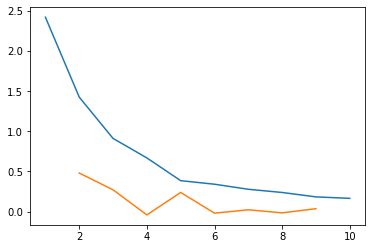

Рекомендованное количество кластеров: 2


In [80]:
# Метод локтя. Позволячет оценить оптимальное количество сегментов.
# Показывает сумму внутри групповых вариаций
last = data_linkage[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2 
print("Рекомендованное количество кластеров:", k)

In [81]:
#функция построения дендрограмм
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

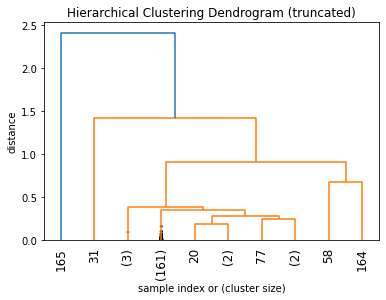

In [82]:
nClust=10

#строим дендрограмму 
fancy_dendrogram(
    data_linkage,
    truncate_mode='lastp',
    p=nClust, 
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
)
plt.show()

In [83]:
# иерархическая кластеризация
clusters=fcluster(data_linkage, nClust, criterion='maxclust')
clusters

array([ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  4,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  9,  3,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  5,  2,  2,  7,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  1,  2,  5,  2,  6,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        3,  2,  2,  2,  2,  2,  2,  2,  2,  2,  1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  8, 10,  2,  2,  2,  2,
        2,  2,  2,  2], dtype=int32)

In [84]:
col

['Офшорні статки',
 'Номінал. ВВП',
 'Загальні податкові втрати',
 'Втрати від под. уникнення',
 'Втрати від под. ухилення',
 'Податк. надходження',
 'Населення']

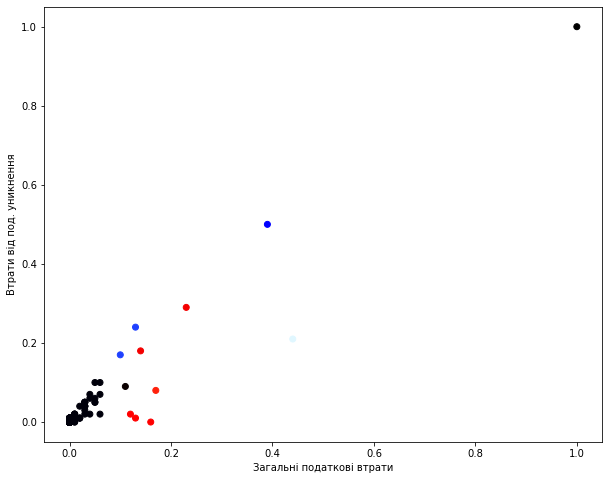

In [85]:
x=2 # Чтобы построить диаграмму в разных осях, меняйте номера столбцов
y=3 #
plt.figure(figsize=(10, 8))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=clusters, cmap='flag')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

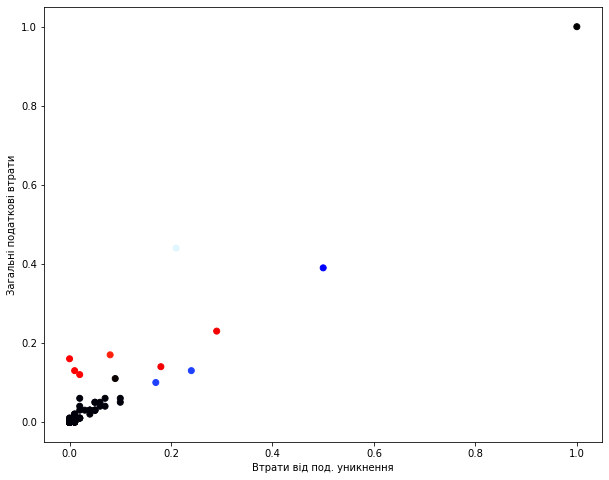

In [94]:
x=3 # Чтобы построить диаграмму в разных осях, меняйте номера столбцов
y=2 #
plt.figure(figsize=(10, 8))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=clusters, cmap='flag')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

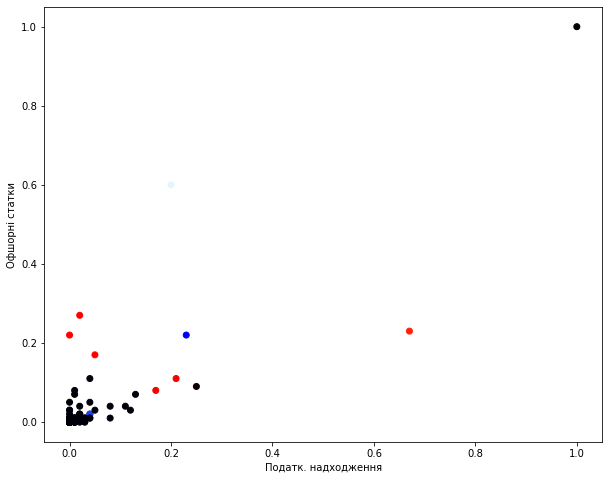

In [87]:
x=-2 # Чтобы построить диаграмму в разных осях, меняйте номера столбцов
y=0 #
plt.figure(figsize=(10, 8))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=clusters, cmap='flag')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

In [88]:
# к оригинальным данным добавляем номер кластера
df['I']=clusters
res=df.groupby('I')[col].mean()
res['Количество']=df.groupby('I').size().values
res #ниже средние цифры по кластерам и количество объектов (Количество)

,Офшорні статки,Номінал. ВВП,Загальні податкові втрати,Втрати від под. уникнення,Втрати від под. ухилення,Податк. надходження,Населення,Количество
I,,,,,,,,
1,0.220000,0.020000,0.136667,0.01000,0.290000,0.023333,0.003333,3
2,0.006025,0.006584,0.006708,0.00882,0.004783,0.007888,0.014658,161
3,0.010000,0.030000,0.115000,0.20500,0.010000,0.030000,0.065000,2
4,0.010000,0.070000,0.170000,0.30000,0.010000,0.130000,0.150000,1
5,0.095000,0.105000,0.185000,0.23500,0.120000,0.190000,0.045000,2
6,0.090000,0.240000,0.110000,0.09000,0.140000,0.250000,0.090000,1
7,0.220000,0.180000,0.390000,0.50000,0.270000,0.230000,0.060000,1
8,0.600000,0.130000,0.440000,0.21000,0.730000,0.200000,0.050000,1
9,0.230000,0.700000,0.170000,0.08000,0.280000,0.670000,1.000000,1


In [89]:
df[df['I']==2] # !!!!! меняйте номер кластера

,Офшорні статки,Номінал. ВВП,Загальні податкові втрати,Втрати від под. уникнення,Втрати від под. ухилення,Податк. надходження,Населення,I
0,0.00,0.00,0.00,0.00,0.00,0.00,0.03,2
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2
2,0.00,0.01,0.01,0.01,0.00,0.01,0.03,2
3,0.01,0.00,0.03,0.04,0.01,0.01,0.02,2
4,0.01,0.02,0.03,0.05,0.01,0.03,0.03,2
...,...,...,...,...,...,...,...,...
169,0.01,0.00,0.01,0.01,0.01,0.01,0.02,2
170,0.00,0.02,0.00,0.01,0.00,0.01,0.07,2
171,0.00,0.00,0.00,0.00,0.00,0.00,0.02,2
172,0.00,0.00,0.00,0.00,0.00,0.00,0.01,2


In [90]:
# строим кластеризаци методом KMeans
km = KMeans(n_clusters=nClust).fit(dataNorm)

In [91]:
# выведем полученное распределение по кластерам
# так же номер кластера, к котрому относится строка, так как нумерация начинается с нуля, выводим добавляя 1
km.labels_ +1

array([10, 10, 10, 10,  1, 10, 10,  5, 10, 10,  1, 10, 10,  5, 10, 10, 10,
       10, 10, 10,  8, 10, 10, 10, 10, 10,  5, 10, 10, 10, 10,  3,  8, 10,
        1, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,  1, 10, 10, 10,
       10,  1, 10, 10,  6, 10, 10,  4, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10,  1,  1,  9, 10,  6, 10,  6, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        8, 10, 10, 10, 10, 10, 10, 10, 10, 10,  9, 10, 10, 10, 10, 10, 10,
        1, 10, 10, 10, 10, 10,  1,  1, 10, 10,  5, 10, 10, 10, 10,  1, 10,
       10, 10, 10,  5, 10, 10, 10, 10,  1,  5,  5, 10, 10, 10, 10, 10,  5,
        5, 10, 10,  1, 10, 10, 10,  1, 10, 10, 10,  7,  2, 10, 10, 10, 10,
        1, 10, 10, 10])

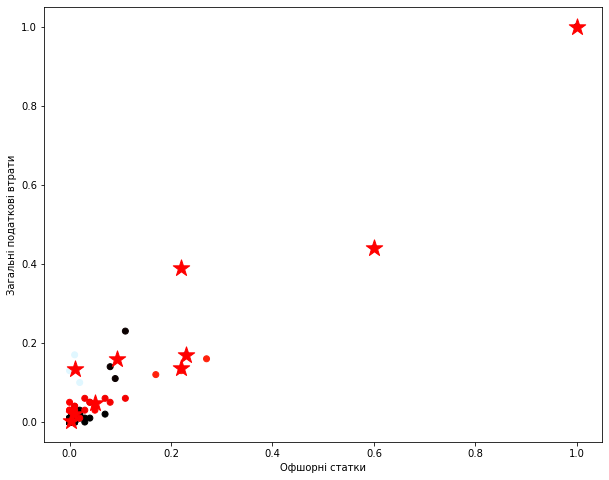

In [92]:
x=0 # Чтобы построить диаграмму в разных осях, меняйте номера столбцов
y=2 #
centroids = km.cluster_centers_
plt.figure(figsize=(10, 8))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=km.labels_, cmap='flag')
plt.scatter(centroids[:, x], centroids[:, y], marker='*', s=300,
            c='r', label='centroid')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

In [93]:
# к оригинальным данным добавляем номера кластеров
df['KMeans']=km.labels_+1
res=df.groupby('KMeans')[col].mean()
res['Количество']=df.groupby('KMeans').size().values
res

,Офшорні статки,Номінал. ВВП,Загальні податкові втрати,Втрати від под. уникнення,Втрати від под. ухилення,Податк. надходження,Населення,Количество
KMeans,,,,,,,,
1,0.008000,0.020667,0.020667,0.034667,0.004667,0.016000,0.074000,15
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.230000,1
3,0.230000,0.700000,0.170000,0.080000,0.280000,0.670000,1.000000,1
4,0.220000,0.180000,0.390000,0.500000,0.270000,0.230000,0.060000,1
5,0.051111,0.051111,0.048889,0.051111,0.050000,0.073333,0.027778,9
6,0.093333,0.150000,0.160000,0.186667,0.126667,0.210000,0.060000,3
7,0.600000,0.130000,0.440000,0.210000,0.730000,0.200000,0.050000,1
8,0.010000,0.043333,0.133333,0.236667,0.010000,0.063333,0.093333,3
9,0.220000,0.020000,0.136667,0.010000,0.290000,0.023333,0.003333,3
